# GloVe



***

This notebook is divided into two sections tasks. We will work with GloVe models trained on Wikipedia data and Twitter data to complete the following tasks:

1. We will evaluate GloVe's word representations by performing a similarity comparison of word pairs. Obtained similarity scores are then evaluated against human-labeled word pairs. Subsequently, we ask you to explore and interpret the results.
2. We will evaluate GloVe's performance in word analogy tasks and compare results across models.


In [1]:
# Use gensim API
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

# You can use additional packages
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Task 1: Evaluate GloVe against Human Annotators

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Load the Dataset</b> 
</div>

First, we will download our evaluation data set ("wordsim353") containing word pairs labelled by humans in terms of their similarity. To access the data, add [this](http://https://www.kaggle.com/datasets/julianschelb/wordsim353-crowd) dataset to your notebook. 

**How to add data to a notebook?**

* Click on "+ Add data" (in the top-right)
* Search for "WordSim353 (crowd)" 
* Use the "plus" button next to the datasets title

**How to access the dataset?**

You find all added datasets listed in the "Data" section under "Input". Datasets are places in the "input" directory. In our case, use the following path to read the CSV file: "../input/wordsim353-crowd/wordsim353crowd.csv"

In [2]:
# Read the evaluation data with pandas
df_path = "/kaggle/input/wordsim353-crowd/wordsim353crowd.csv"
df = pd.read_csv(df_path)

# Print the first 5 five rows
print(df.head(5))


         Word 1     Word 2  Human (Mean)
0     admission     ticket        5.5360
1       alcohol  chemistry        4.1250
2      aluminum      metal        6.6250
3  announcement     effort        2.0625
4  announcement       news        7.1875


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Load the Model</b> 
</div>

In the next step, we download two GloVe models from the Gensim API (this can take a moment). The first model is trained on Wikipedia data, the second model is trained on Twitter data. More information about the model architecture and training ground-truth is provided here: https://nlp.stanford.edu/projects/glove/. GloVe models can be accessed through several APIs. We will use the Gensim API here (https://radimrehurek.com/gensim/) since it provides an easy-to-use GloVe model.

Load the model based on Wikipedia and Gigaword data with embedding size = 50 (400000 records) and model based on Twitter data with embedding size = 200 (1193514 records).

<div style="position:relative; padding:.75rem 1.25rem; margin-bottom:1rem; border:1px solid transparent; border-radius:.25rem; background-color:#f8cfcc; border-color:#b85450; color:#990000">
    <b>Internet Access Required!</b>
    <br>
    Ensure you have enabled internet access on Kaggle. Without it, you won't be able to download packages, models, or datasets. You may need to verify your account first. After verification, you will also have access to GPUs, which we will use later for training and inference. You can enable internet access in the 'Notebook options' in the menu on the right.
</div>

In [3]:
# Load both models using the gensim api
model_wiki_50 = api.load("glove-wiki-gigaword-50")
model_tw_200 = api.load("glove-twitter-200")

[==================================================] 100.0% 66.0/66.0MB downloaded
[==================================================] 100.0% 758.5/758.5MB downloaded


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Calculate the Cosine Similarity </b> 
</div>

In the next step, we ask you to let both models calculate the cosine similarity of all word pairs' vector representation the wordsim353 data set provides (We need these predicted similarity scores to evaluate how the models' word representations behave compared to the human labels). 
​
Please implement the following steps:
1. Create two empty lists (for both models) to store the similarity scores. Name the lists "pred_wiki" and "pred_twitter"
2. Iterate over the word pairs and calculate the cosine similarity for every pair. You can use the .similarity() method, which we already used in the Kaggle Tutorial. (*Hint:* For some words, the models might not yield word representations, and you receive a KeyError. This is because each model has a restricted vocabulary set (i.e., some words did not occur in sufficient frequency in the training data that was used to train the models). You might need to implement some error handling using *try and except* statements.

In [4]:
# Preprocess data if necessary

In [5]:
# Function for predicting similarity
wiki_sim = []
tw_sim = []
excepts_wiki = []
excepts_tw = []
def comp_sim():
    loc1 = "Word 1"
    loc2 = "Word 2"
    for i in range(df.shape[0]):
        word1 = df.loc[i, loc1]
        word2 = df.loc[i, loc2]
        try:
            pred_wiki = model_wiki_50.similarity(word1, word2)
            wiki_sim.append(pred_wiki)
        except KeyError as e: # to store the problematic keys
            error_message = str(e)
            problematic_key = error_message.split("'")[1]
            if problematic_key not in excepts_wiki:
                excepts_wiki.append(problematic_key)
        try:
            pred_tw = model_tw_200.similarity(word1, word2)
            tw_sim.append(pred_tw)
        except KeyError as e:
            error_message = str(e)
            problematic_key = error_message.split("'")[1]
            if problematic_key not in excepts_tw:
                excepts_tw.append(problematic_key)
# Predict similarity
comp_sim()

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Match Similarity Score with Human Label</b> 
</div>

Since the models did not yield word representations for every word contained in the wordsim353 data set, you now have to remove all the words from wordsim353 for which you did not get word representations. This step is required for later exploratory analyses.

Please implement the following step:
- filter the wordsim353 data set such that only word pairs remain for which you have predicted similarity scores.

In [6]:
# Match predicted and human labels

# Wikipedia
mask =  ~df.isin(excepts_wiki).any(axis=1)
filtered_df_wiki = df[mask]
print(filtered_df_wiki.head(5))

# Twitter
mask =  ~df.isin(excepts_tw).any(axis=1)
filtered_df_tw = df[mask]
print(filtered_df_tw.head(5))


         Word 1     Word 2  Human (Mean)
0     admission     ticket        5.5360
1       alcohol  chemistry        4.1250
2      aluminum      metal        6.6250
3  announcement     effort        2.0625
4  announcement       news        7.1875
         Word 1     Word 2  Human (Mean)
0     admission     ticket        5.5360
1       alcohol  chemistry        4.1250
2      aluminum      metal        6.6250
3  announcement     effort        2.0625
4  announcement       news        7.1875


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Compare Similarity Score with Human Label</b> 
</div>

Now that we have a list of GloVe-predicted and human-generated similarity scores for both the Wikipedia and Twitter model, we want to evaluate to what extent our predicted scores resemble the human scores. 
We can for example check the association between both scores by a simple correlation analysis.

Please implement the following steps:
- Calculate the Spearman correlation between the predicted and human-generated similarity scores for both models (you can use the stats package together with the .spearman() method here). 
- Print out the correlation coefficients and p-values.
- Discuss in a written statement: What can you infer from the results?

In [7]:
# Get correlation between predicted similarities and human labels and print out results
human_means_wiki = []
human_means_tw = []
for i in range(filtered_df_wiki.shape[0]):
    mean = filtered_df_wiki.iloc[i, 2]
    human_means_wiki.append(mean)
for i in range(filtered_df_tw.shape[0]):
    mean = filtered_df_tw.iloc[i, 2]
    human_means_tw.append(mean)
# Wikipedia model
wikipedia_correlation, wikipedia_p_value = stats.spearmanr(wiki_sim, human_means_wiki)
tw_correlation, tw_p_value = stats.spearmanr(tw_sim, human_means_tw)
# Twitter model
print("Spearman correlation for Wikipedia model:", wikipedia_correlation)
print("P-value for Wikipedia model:", wikipedia_p_value)
print("Spearman correlation for Twitter model:", tw_correlation)
print("P-value for Twitter model:", tw_p_value)


Spearman correlation for Wikipedia model: 0.45527727945955065
P-value for Wikipedia model: 1.5169716787890722e-18
Spearman correlation for Twitter model: 0.49059011038067935
P-value for Twitter model: 1.2501605696656663e-21


**Your interpretation:**

Predictions made using the "Twitter"-Model are slightly more correlated with the human predictions. We could understand from this that a human would agree slightly more with the embedding produced by this model. The correlation is in both cases are moderate. (between .40 - .59)

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 5: Visualize Results</b> 
</div>


Next, we want to plot the predicted and human-generated similarity scores to check for outliers. Please implement the following steps for both models:

- use the [.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) method from Matplotlib to create a scatter plot: plot the human-generated similarity scores as a function of the GloVe-predicted similarity scores
- also plot the indices of word pairs as z-axis to have a reference from the outlier word representations to the original words. 
- Discuss: What can you infer from the plots?

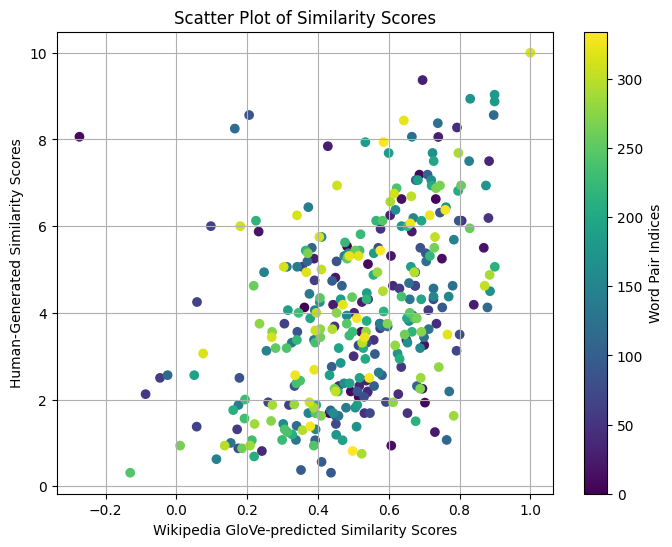

In [8]:
# Scatterplot for similarity scores from Wikipedia GloVe
indices_wiki = list(range(len(human_means_wiki)))
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(wiki_sim, human_means_wiki, c=indices_wiki, cmap='viridis', marker='o')
plt.xlabel('Wikipedia GloVe-predicted Similarity Scores')
plt.ylabel('Human-Generated Similarity Scores')
plt.title('Scatter Plot of Similarity Scores')
plt.colorbar(label='Word Pair Indices')
plt.grid(True)
plt.show()


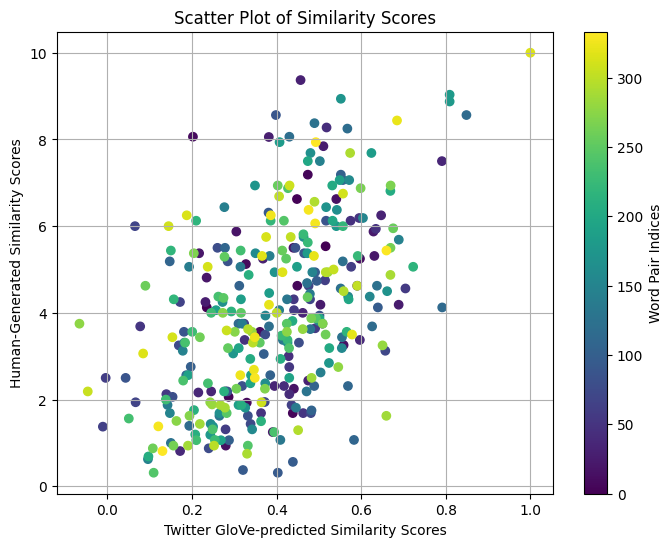

In [9]:
#  Scatterplot for similarity scores from Twitter GloVe

indices_tw = list(range(len(human_means_tw)))
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tw_sim, human_means_tw, c=indices_tw, cmap='viridis', marker='o')
plt.xlabel('Twitter GloVe-predicted Similarity Scores')
plt.ylabel('Human-Generated Similarity Scores')
plt.title('Scatter Plot of Similarity Scores')
plt.colorbar(label='Word Pair Indices')
plt.grid(True)
plt.show()

**Your interpretation:**

We believe that these scatter plots give us an idea about the difference of the outliers, and where they "heavily" are situated. The "Wiki-Human" scatter plot shows more outliers towards 0, or even negative prediction scores of the X-Axis. We believe the reason for this is the fact that, as we have seen before, the "Wiki-Human" comparison shows overlaps with "better" scores towards 1 on the X-Axis, compared to the other scatter plot. As the data is heavily scattered towards 1 (mostly situated around 0.4 - 0.8), the outliers stand out and are less on the smaller prediction points on the X-Axis. However, for the Twitter-Human scatter plot, we can see that the outliers stand out more, the more we get closer to 1 on the X-Axis. This is due to the fact that, on average the comparison scores overlap around 0.2 - 0.6, lower than the previous scatter plot. This, visually, makes it apparent that the outliers stand out more the closer we get to 1 on the X-Axis.

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 6: Find Outliers</b> 
</div>

In the second to last task, we ask you to print out a table (e.g. a pandas dataframe) containing every word pair and the absolute difference between the predicted and human-generated similarity score in descending order (Starting with the word pair for which the similarities differ the most).

Please implement the following steps for both models:
- calculate the absolute difference between the predicted and human-generated similarity scores. To obtain meaningful scores here, please first normalize the data using below function.
- print out a table showing the word pairs and their absolute difference score.
- For which pairs you get high and low scores, respectively? Does this make sense?


In [10]:
# Function to apply min max normalization to a list
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

pairs_wiki = [] #word pairs will be required for following steps
pairs_tw = []
for j in range(len(indices_wiki)):
    word1 = filtered_df_wiki.iloc[j, 0]
    word2 = filtered_df_wiki.iloc[j, 1]
    pair = "{}  {}".format(word1, word2)
    pairs_wiki.append(pair)

for j in range(len(indices_tw)):
    word1 = filtered_df_tw.iloc[j, 0]
    word2 = filtered_df_tw.iloc[j, 1]
    pair = "{}  {}".format(word1, word2)
    pairs_tw.append(pair)

In [11]:
# Wikipedia GloVe
# Calculate absolute difference between similarity scores
# Calculate absolute difference between similarity scores
norm_pred_wiki = NormalizeData(wiki_sim)
norm_human_wiki = NormalizeData(human_means_wiki)
abso_wiki = [abs(pred - human) for pred, human in zip(norm_pred_wiki, norm_human_wiki)]

In [12]:
# Twitter GloVe
# Calculate absolute difference between similarity scores
norm_pred_tw = NormalizeData(tw_sim)
norm_human_tw = NormalizeData(human_means_tw)
abso_tw = [abs(pred - human) for pred, human in zip(norm_pred_tw, norm_human_tw)]

In [13]:
# Wikipedia GloVe (Outliers)
datas = {'Word Pair': pairs_wiki, 'Absolute Difference': abso_wiki}
df2 = pd.DataFrame(datas)
df2 = df2.sort_values(by='Absolute Difference', ascending=False)
print(df2.head(5))

                 Word Pair  Absolute Difference
10        asylum  madhouse             0.800000
109            five  month             0.736287
285            start  year             0.694474
21   board  recommendation             0.691545
12          attempt  peace             0.627013


In [14]:
# Twitter GloVe Outliers
datas1 = {'Word Pair': pairs_tw, 'Absolute Difference': abso_tw}
df3 = pd.DataFrame(datas1)
df3 = df3.sort_values(by='Absolute Difference', ascending=False)
print(df3.head(5))

            Word Pair  Absolute Difference
10   asylum  madhouse             0.548291
285       start  year             0.545102
109       five  month             0.530791
68     cup  tableware             0.463933
96      drink  mother             0.447550


**Your interpretation:**

In our opinion, looking at the outliers of both dataframes, some of them make sense, but some of them were quite surprising:

- In the case of "tiger" and "tiger", it is quite obvious why in both dataframes the absolute is 0.
- Pairs such as "fertility"-"egg", "planet"-"moon","cup"-"coffee","investor-"earning", "calculation" - "computation", "treatment" - "recovery", "food" - "preparation", "computer" - "internet" are expected to have an absolute value near to 0, since being semantically extremely "close", or words that are commonly used together.
- Pairs such as "start"-"year","five"-"month", "attempt"-"peace", "drink"-"mother", "board"-"recommendation" are expected to have an absolute value near to 1. They are not semantically linked, and even though they might be used together rarely, it is not a common case.
- Pairs such as "asylum"-"madhouse", "cup"-"tableware" were the outliers that surprised us. One could argue that these pairs are more semantically linked compared to the pairs we have presented in the previous bullet point. Although they might have similar connotations, they are used in different contexts. Still, we were expecting pairs like this to have an absolute value closer to 0, compared to their current value.

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 7: Find Outliers</b> 
</div>


Finally, we want to compare the word representations from the Wikipedia GloVe with the vectors from Twitter GloVe. We ask you to plot the similarity scores and print out a table with difference scores similarly to previous tasks.
​
Please implement the following steps:
- Check if both the Wikipedia and Twitter model yield word embeddings for the same set of word pairs. If not, filter the lists of predicted similarity scores such that you obtain a list of similarity scores with matching word pairs.
- Plot the similarity scores as in Step 5. Now, please plot the similarities predicted by the Wikipedia Glove as a function of the similarities predicted by the Twitter model.
- Print out a table showing the word pairs and their absolute difference score (in terms of similarity scores of both models) in descending order, as in Task 6.
- What can you infer from the results? Are the similarity predictions of both models similar or not?

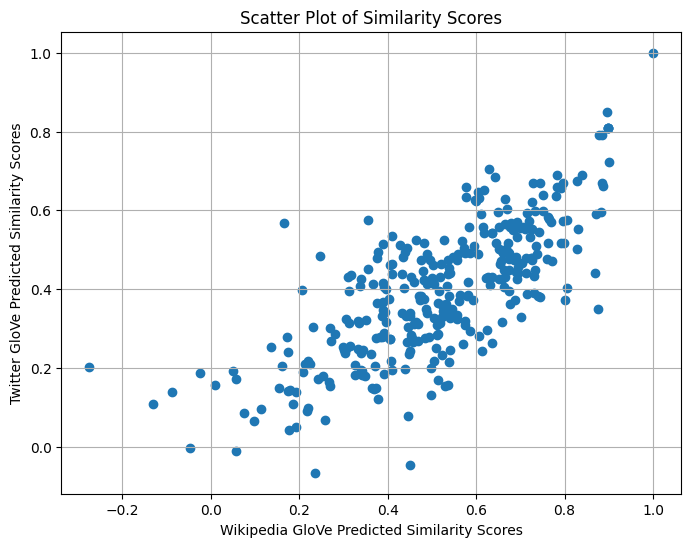

In [15]:
# Plot similarities of Wikipedia and Twitter model
data_tw = {'Word Pair':pairs_tw,
           'sim': tw_sim}
df_tw = pd.DataFrame(data_tw)# creating df to compare with each other
data_wiki = {'Word Pair':pairs_wiki,
           'sim': wiki_sim}
df_wiki = pd.DataFrame(data_wiki)
matching_rows = pd.merge(df_tw, df_wiki, on='Word Pair')## We aware that while comparing two dfs the method adds one specific pair more than once. We could not find any solution or any other way to do the task. Besides, it probably does not effect the result in this case. That's why, we kept it.
matched_tw = matching_rows.drop('sim_y', axis=1)
matched_wiki = matching_rows.drop('sim_x', axis=1)
# Scatterplot for similarity scores from Twitter GloVe
plt.figure(figsize=(8, 6))
plt.scatter(matched_wiki['sim_y'], matched_tw['sim_x'], marker='o')
plt.xlabel('Wikipedia GloVe Predicted Similarity Scores')
plt.ylabel('Twitter GloVe Predicted Similarity Scores')
plt.title('Scatter Plot of Similarity Scores')
plt.grid(True)
plt.show()


In [16]:
# Print out table representing word pairs and absolute difference between similarity scores of both models
norm_matched_wiki1 = []
norm_matched_tw1 = []
for i in range(len(matched_wiki)):
    mean = matched_wiki.iloc[i, 1]
    norm_matched_wiki1.append(mean)
norm_matched_wiki = NormalizeData(norm_matched_wiki1)
for i in range(len(matched_tw)):
    mean = matched_tw.iloc[i, 1]
    norm_matched_tw1.append(mean)
norm_matched_tw = NormalizeData(norm_matched_tw1)

absolut = [abs(wikipedia - twitter) for wikipedia, twitter in zip(norm_matched_wiki, norm_matched_tw)]
data3 = {'Word Pair': matching_rows['Word Pair'], 'Absolute Difference Score': absolut}

df4 = pd.DataFrame(data3)
df4 = df4.sort_values(by='Absolute Difference Score', ascending=False)

print(df4.head(5))

                  Word Pair  Absolute Difference Score
307    territory  kilometer                   0.549677
174         mile  kilometer                   0.512222
78   deployment  withdrawal                   0.431202
51        concert  virtuoso                   0.430941
221   planet  constellation                   0.427537


**Your interpretation:**

Looking at our final table and scatter plot, we think it is safe to say that there are quite a lot of similarities. However, also based on our previous findings, it is obvious that these models have their differences. The scatter plot shows us some clear outliers, while the preview of the table shows us an absolute difference value above .40 for several pairs. To sum it up, they share a lot of similarities, while having their differences.

## Task 2: Evaluate GloVe for Word Analogies

In [this week's paper](https://aclanthology.org/D14-1162/) (Section 4.1), the authors evaluated GloVe for word analogy task, and we will replicate this evaluation. In this setting, the model is used to solve questions following this pattern: 

> *a* is to *b* like *c* is to *???*. 

The objective is to predict the fourth word by finding the word with the most similar vector representation to: $ vector_a - vector_b  + vector_c $. With $ vector_a $ being the vector representation of the first word in the question. Examples are:

* *Bern* is to *Switzerland* like *Tokyo* is to **Japan**
* *Mouse* is to *mice* like *computer* is to **computers**

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Load the Dataset</b> 
</div>

We will add another dataset containing the word analogy questions. Repeat the same steps as described in Task 1, but this time add the dataset [word-analogy-test](https://www.kaggle.com/datasets/julianschelb/word-analogy-test) dataset to your notebook and read the data as pandas dataframe. This dataset can be used to test a language model's capabilities in word analogy tasks. Every row contains a quadruple out of four word tokens. 

In [17]:
# Load the dataset as dataframe
df = pd.read_csv('/kaggle/input/word-analogy-test/questions-words.csv')

# Print the first five rows
print(df.head(5))


   row_id                  category word_one word_two word_three    word_four
0       0  capital-common-countries   Athens   Greece    Baghdad         Iraq
1       1  capital-common-countries   Athens   Greece    Bangkok     Thailand
2       2  capital-common-countries   Athens   Greece    Beijing        China
3       3  capital-common-countries   Athens   Greece     Berlin      Germany
4       4  capital-common-countries   Athens   Greece       Bern  Switzerland


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Load Models</b> 
</div>

We will load one addition model which yields word vectors of dimensionality 200 to compare it with the smaller models we used so far:

 * Load the larger model "glove-wiki-gigaword-200" 
 * Load the smaller model "glove-wiki-gigaword-50" 

In [18]:
# Load both models 
model_wiki_50 = api.load("glove-wiki-gigaword-50")
model_wiki_200 = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Make Predictions</b> 
</div>

After we loaded the datasets and models, we are now ready to make predictions. In this case, we want to predict the fourth word in our dataset to evaluate GloVe's performance. We ask you to do implement the following:

* Preprocess the dataset if necessary (*Hint: GloVe's vocabulary is lower case only*)
* Implement a function which takes word_one, word_two and word_three, and the model as parameters and predicts the missing fourth word using $ vector_a - vector_b  + vector_c $. (*Hint: Gensim provides the method [.most_similar()](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html), which already has this functionality implemented.*)
* Test your function with 'man', 'king' and 'woman'. The result should be 'queen'.


In [19]:
# Preprocessing
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(df.head(5))

   row_id                  category word_one word_two word_three    word_four
0       0  capital-common-countries   athens   greece    baghdad         iraq
1       1  capital-common-countries   athens   greece    bangkok     thailand
2       2  capital-common-countries   athens   greece    beijing        china
3       3  capital-common-countries   athens   greece     berlin      germany
4       4  capital-common-countries   athens   greece       bern  switzerland


In [20]:
# Function for prediction
def predict(word_one, word_two, word_three, model):
    predictions = model.most_similar(positive=[word_two,word_three], negative=[word_one])
    best_pred = list(predictions[0])
    return best_pred[0]

# Test your function
predict("athens", "greece","berlin",model_wiki_50)

'germany'

Now that you validated that your function works, we proceed by using the data in our evaluation dataset. Use the previous implemented function to predict the fourth word token and store the predictions in a new dataframe column. Do this for both models. Because the dataset contains 19544 data points, processing will take about 3-5 minutes. You can use a for loop, but generally speaking the [.apply())](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method is faster.

*Hint: For processing larger datasets, displaying the current progress is useful. The python package [tqdm](https://tqdm.github.io/docs/notebook/) can be used to display a progress bar and estimated time remaining.*

In [21]:
# Predictions using larger model
from tqdm import tqdm
tqdm.pandas()
df['pred_larger'] = df.progress_apply(lambda row: predict(row['word_one'], row['word_two'], row['word_three'], model_wiki_200), axis=1)

100%|██████████| 19544/19544 [08:31<00:00, 38.19it/s]


In [22]:
# Predictions using smaller model
df['pred_smaller'] = df.progress_apply(lambda row: predict(row['word_one'], row['word_two'], row['word_three'], model_wiki_50), axis=1)

100%|██████████| 19544/19544 [05:00<00:00, 65.08it/s]


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Interpret Results</b> 
</div>

In this final step, we ask you to evaluate the predictions produced by both models by completing the following tasks:

* Compare the predicted word token with the correct token in the dataset (word_fourth).
* Calculate the overall accuracy achieved for each model.
* Calculate the accuracy per category and visualize the result as [bar chart(s)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). 
* Finally, write a few sentences about how you interpret the results.

*Hint: For processing and aggregating dataframes the methods [.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and [.aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) are commonly used.*

In [23]:
# Compare prediction with ground truth for both models
df['correct_larger'] = df['pred_larger'] == df['word_four']
df['correct_smaller'] = df['pred_smaller'] == df['word_four']

# Calculate overall accuracy for both models
accuracy_larger = df['correct_larger'].mean()
accuracy_smaller = df['correct_smaller'].mean()
print("Mean accuracy for gigaword50:",accuracy_smaller)
print("Mean accuracy for gigaword200:",accuracy_larger)


Mean accuracy for gigaword50: 0.4621878837494883
Mean accuracy for gigaword200: 0.6977077363896849


In [24]:
# Calculate accuracy per category for both models
accuracy_per_category_larger = df.groupby('category')['correct_larger'].mean()
accuracy_per_category_smaller = df.groupby('category')['correct_smaller'].mean()


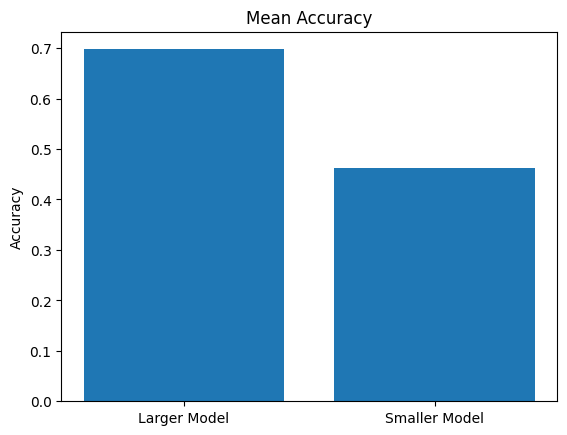

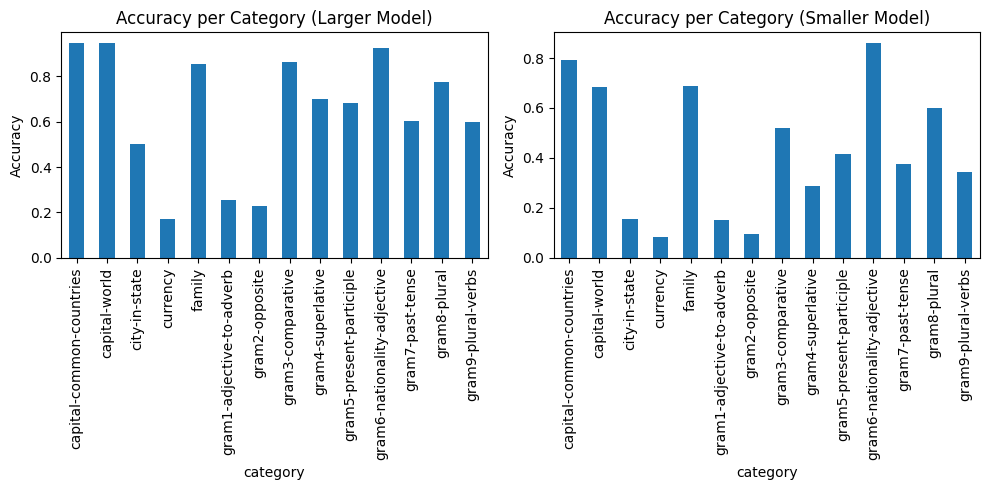

In [25]:
# Bar chart showing accuracy
plt.bar(['Larger Model', 'Smaller Model'], [accuracy_larger, accuracy_smaller])
plt.title('Mean Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot accuracy per category
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
accuracy_per_category_larger.plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy per Category (Larger Model)')
axes[0].set_ylabel('Accuracy')

accuracy_per_category_smaller.plot(kind='bar', ax=axes[1])
axes[1].set_title('Accuracy per Category (Smaller Model)')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Your interpretation:**

The most apparant interpretation that we can draw from these outcomes is the fact that, a larger model, in this case, led to greater accuracy. The larger model was more accurate both overall, and also in every single category in the category comparison task.
However, there was an interesting outcome for me when looking at the category task for the smaller model, specifically. When compared to the larger model, it is quite obvious to see that some categories performed quite well, even sometimes with a near-accuracy score to that of the larger model. I infered from this that, categories such as "capital-common-countries", "capital-world", "family" and "gram6-nationality-adjective" must have had more data, which would led to near-similar accuracies for the smaller and the larger models.